<a href="https://colab.research.google.com/github/leilaabdel/breast-cancer-multiomic-networks/blob/main/notebooks/centrality_ablation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ablation and Centrality

In [ ]:
!rm -rf *.png

In [ ]:
#Retrieve the graphs
G_undir = pickle.load(open(ROOT + '/data/undirected_graph.pickle' , 'rb'))
G_dir = pickle.load(open(ROOT + '/data/directed_graph.pickle' , 'rb'))

276
[2.44887023e-06 1.30885988e+00]
266
[1.98466324e-06 1.46438715e+00]
256
[1.87336966e-06 1.46237432e+00]
246
[1.87100121e-06 1.61290670e+00]
236
[2.65269915e-06 8.45726921e-01]
226
[8.40722645e-07 1.78609147e+00]


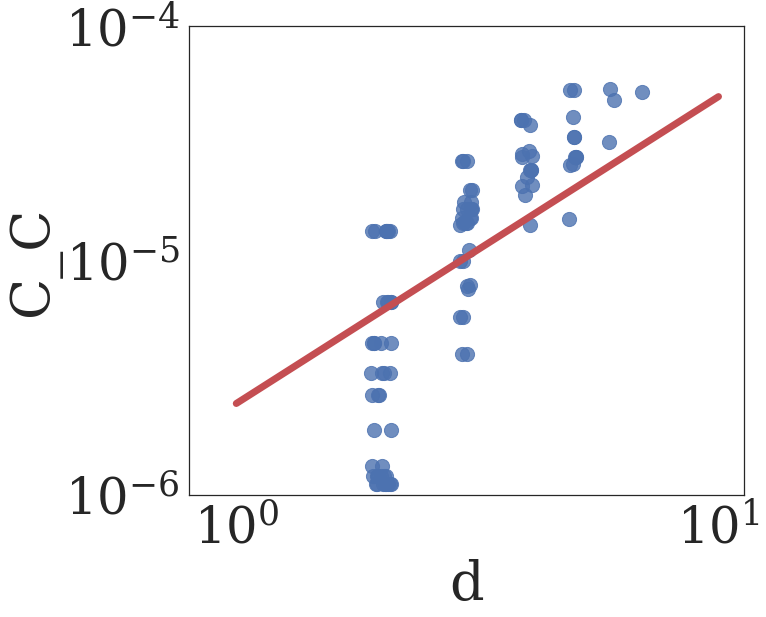

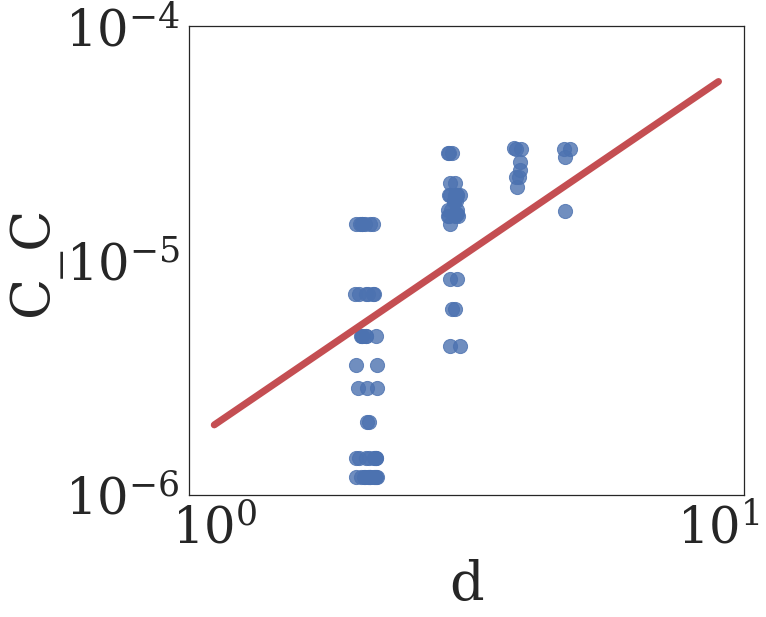

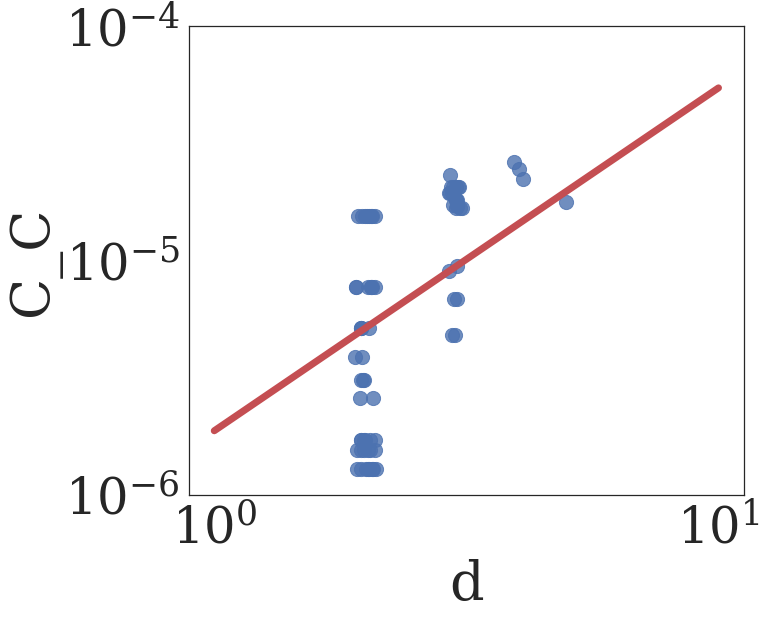

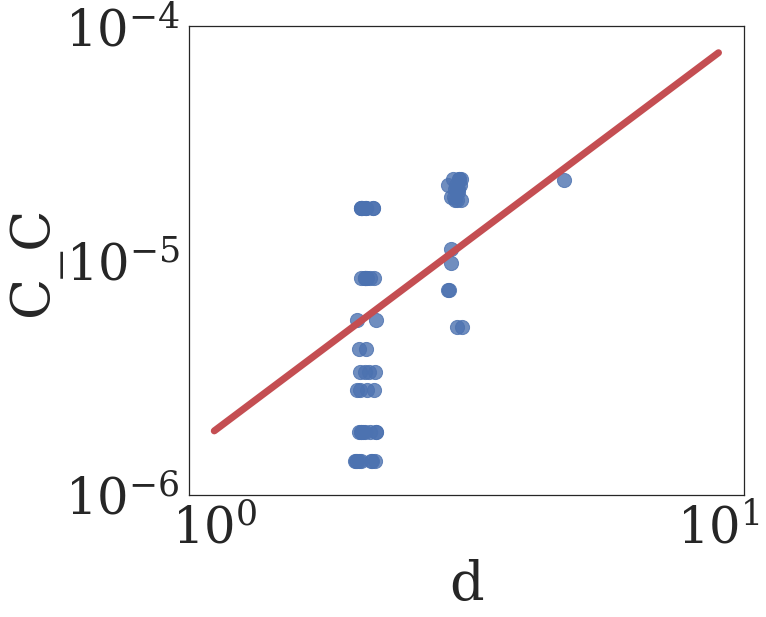

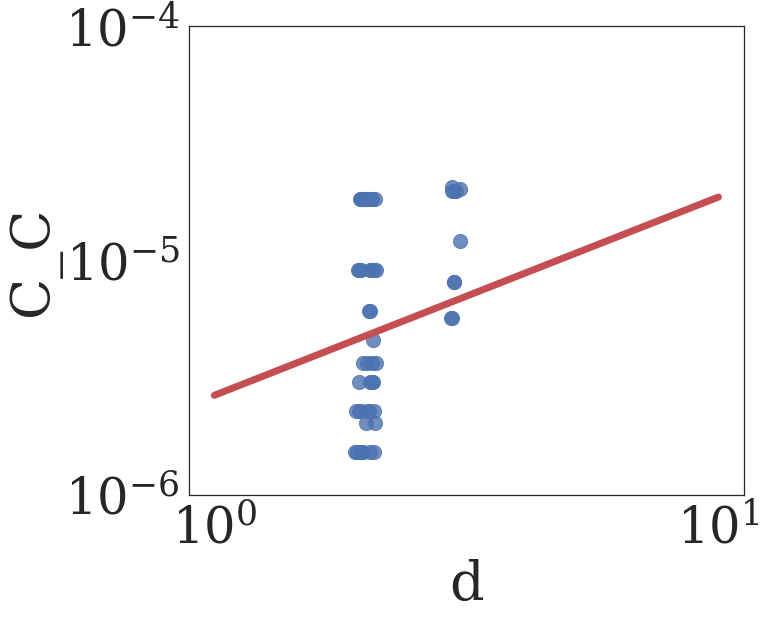

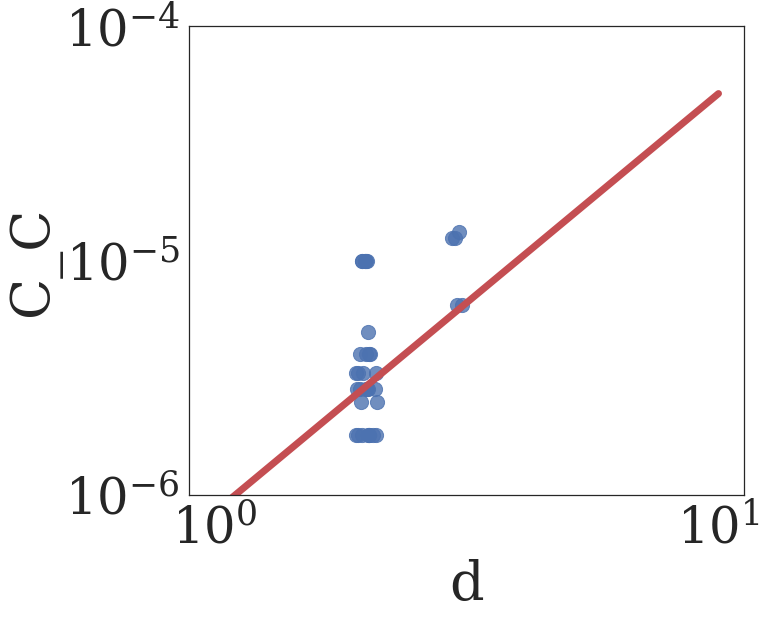

In [ ]:
from scipy import stats
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.ticker as plticker
TIMES = 6
TYPE = 'closeness_cent_dir'
for j in range(TIMES):
  gene_names = []
  gene_betweenness = []
  print(len(G_dir.nodes()))
  auth = nx.betweenness_centrality(G_dir)


  for key, values in auth.items():
    if isAllPresent(key):
      gene_names.append(key)
      gene_betweenness.append(values)
  a = np.argsort(gene_betweenness , axis=0)
  gene_betweenness = np.asarray(gene_betweenness)
  gene_names = np.asarray(gene_names)
  deg_dict = nx.degree(G_dir)
  deg = []
  gene_betweenness = gene_betweenness[a]
  gene_names = gene_names[a]
  for i in range(len(gene_names)):
    deg.append(deg_dict[gene_names[i]])

  deg = np.asarray(deg)
  G_dir.remove_nodes_from(gene_names[-10:])


  data = pd.DataFrame({'d': deg , 'C_C' : gene_betweenness  })
  z = np.abs(stats.zscore(data))
  data = data[(z < 2).all(axis=1)]
  newX = np.logspace(0, 1, base=10)
  def myExpFunc(x, a, b):
    return a * np.power(x, b)
  popt, pcov = curve_fit(myExpFunc, data['d'], data['C_C'])
  print(popt)
  f, ax = plt.subplots(figsize=(12, 10))

  ax.set(xscale="log", yscale="log")
  y = myExpFunc(newX , popt[0] , popt[1])
  plt.plot(newX, y, 'r-', linewidth=7.0)
  # plt.xticks([])
  log = sns.regplot(x='d' , y='C_C' , data=data ,  x_jitter=.1 , scatter_kws={'s':200}, fit_reg=False )
  ax.set_ylim([1 * 10**-6, 1 * 10**-4])
  # ax.set_xlim([10**0,10**.8])
  plt.tight_layout()
  f.savefig(f'{TYPE}_number_removed_{(j * 10)}.png', dpi=300)